In [1]:
# Importing necessary libraries :
import pandas as pd

In [4]:
# Reading csv file separated by a comma :
student_scores_df = pd.read_csv("student_scores.csv", sep = ",")

In [79]:
# Displaying only 10 rows dataset :
student_scores_df.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [7]:
# Checking rows and columns in datasets :
student_scores_df.shape

(25, 2)

In [132]:
# Checking for any null balues in dataset :
student_scores_df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [8]:
# Checking for statistical data from dataset :
student_scores_df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# Visualizing Variables

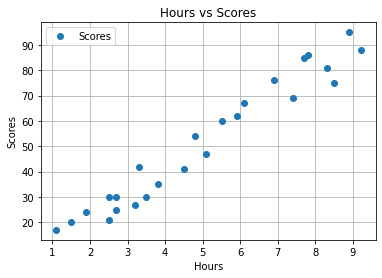

In [134]:
# Plotting the graph to know the relationship :
import matplotlib.pyplot as plt
student_scores_df.plot(x = 'Hours', y = 'Scores', style = 'o')
plt.title("Hours vs Scores")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.grid()
plt.show()

**From the above graph it is clear that the dataset of Hours vs Scores follow a Linear Relationship.**

# BUILDING ML MODEL AND TRAINING THE MODEL

### **Preparing the data**

Dividing the data into "attributes" (inputs) and "labels" (outputs).

In [298]:
X = student_scores_df.iloc[:,:-1].values
y = student_scores_df.iloc[:,1].values

In [299]:
X.size, y.size

(25, 25)

**Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:**

In [271]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [272]:
# Printing shapes :
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(20, 1)
(5, 1)
(20,)
(5,)


**TRAINING OUR MODEL**

We have split our data into training and testing sets, and now we will train our model. 

In [273]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
print("Training Completed Successfully")

Training Completed Successfully


In [274]:
intercept = regressor.intercept_
coefficient = regressor.coef_
print("Slope of the line is : ", coefficient)
print("Intercept of the line is : ", intercept)

Slope of the line is :  [9.91065648]
Intercept of the line is :  2.018160041434662


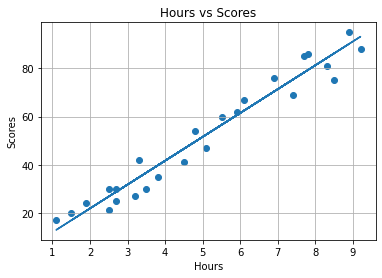

In [275]:
# Plotting the regression line
line = coefficient * X + intercept

# Plotting the test data
plt.scatter(X, y)
plt.plot(X, line)
plt.title("Hours vs Scores")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.grid()
plt.show()

### **Making Predictions**

Now we have trained our algorithm, it's time to make some predictions.

In [276]:
# Predicting the scores :
y_pred = regressor.predict(X_test) 

# Comparing Actual vs Predicted on the basis of Testing Hours : 
df = pd.DataFrame({'Testing Hours': X_test.reshape(-1,), 'Actual': y_test, 'Predicted': y_pred})  
df

,Testing Hours,Actual,Predicted
0,1.5,20,16.884145
1,3.2,27,33.732261
2,7.4,69,75.357018
3,2.5,30,26.794801
4,5.9,62,60.491033


**Let's Check different Mean Errors**

In [277]:
from sklearn import metrics
import numpy as np
print('Mean Absolute Error : ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error : ', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("Model Score: ", regressor.score(X_test, y_test))

Mean Absolute Error :  4.183859899002982
Mean Squared Error :  21.598769307217456
Root Mean Squared Error :  4.647447612100373
Model Score:  0.9454906892105354


**Predicting User Data**

In [296]:
# Function for predicting Marks on the basis of hours :
def predict_marks(x):
    hr = np.array(x)
    marks = regressor.predict(hr.reshape(-1, 1))
    print("Entered Hours = {}".format(hr))
    print("Predicted Marks = {}".format(marks[0]))

In [297]:
n = float(input("Enter the hours to predict marks : "))
predict_marks(n)

Enter the hours to predict marks : 9.25
Entered Hours = 9.25
Predicted Marks = 93.69173248737539
